# Summary

####  This dataset was colllected from kaggle and is collection of customer's records from a supermarket records of 2 years. It has consists of 2240 records (rows) and 29 features(columns). 

#### Our objective is to segregrate the data into groups such that they reflect similarities of the customers in each group. This will be useful for business purposes as we can cater to different needs and requirements of our customers, and modify our products to suit our customer needs. We can also direct customer specfic promotional deals and camapaigns that can help in boosting our sales and popularity of our products.

#### Here we will be performing an 'Unsupervised Classifcation' on the dataset. We will try to segreagrate the dataset into clusters first and then try to evaluate the same.

--------

# Data Wrangling

In [62]:
# Load Necessary Libraries

import numpy as np
import pandas as pd
import datetime
from datetime import date

import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.experimental import enable_iterative_imputer
from sklearn.impute import IterativeImputer

from sklearn.preprocessing import RobustScaler

from sklearn.decomposition import PCA

from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
from scipy.spatial.distance import cdist

from sklearn.cluster import AgglomerativeClustering

import warnings
warnings.filterwarnings('ignore')

In [63]:
df = pd.read_csv('marketing_campaign.csv', sep=';')

In [64]:
df.head()

,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,...,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response
0,5524,1957,Graduation,Single,58138.0,0,0,2012-09-04,58,635,...,7,0,0,0,0,0,0,3,11,1
1,2174,1954,Graduation,Single,46344.0,1,1,2014-03-08,38,11,...,5,0,0,0,0,0,0,3,11,0
2,4141,1965,Graduation,Together,71613.0,0,0,2013-08-21,26,426,...,4,0,0,0,0,0,0,3,11,0
3,6182,1984,Graduation,Together,26646.0,1,0,2014-02-10,26,11,...,6,0,0,0,0,0,0,3,11,0
4,5324,1981,PhD,Married,58293.0,1,0,2014-01-19,94,173,...,5,0,0,0,0,0,0,3,11,0


#### Our Dataset has the following attributes:-

##### People -
    ID: Customer's unique identifier
    Year_Birth: Customer's birth year
    Education: Customer's education level
    Marital_Status: Customer's marital status
    Income: Customer's yearly household income
    Kidhome: Number of children in customer's household
    Teenhome: Number of teenagers in customer's household
    Dt_Customer: Date of customer's enrollment with the company
    Recency: Number of days since customer's last purchase
    Complain: 1 if customer complained in the last 2 years, 0 otherwise

##### Products -
    MntWines: Amount spent on wine in last 2 years
    MntFruits: Amount spent on fruits in last 2 years
    MntMeatProducts: Amount spent on meat in last 2 years
    MntFishProducts: Amount spent on fish in last 2 years
    MntSweetProducts: Amount spent on sweets in last 2 years
    MntGoldProds: Amount spent on gold in last 2 years

##### Promotion -
    NumDealsPurchases: Number of purchases made with a discount
    AcceptedCmp1: 1 if customer accepted the offer in the 1st campaign, 0 otherwise
    AcceptedCmp2: 1 if customer accepted the offer in the 2nd campaign, 0 otherwise
    AcceptedCmp3: 1 if customer accepted the offer in the 3rd campaign, 0 otherwise
    AcceptedCmp4: 1 if customer accepted the offer in the 4th campaign, 0 otherwise
    AcceptedCmp5: 1 if customer accepted the offer in the 5th campaign, 0 otherwise
    Response: 1 if customer accepted the offer in the last campaign, 0 otherwise

##### Place -
    NumWebPurchases: Number of purchases made through the company’s web site
    NumCatalogPurchases: Number of purchases made using a catalogue
    NumStorePurchases: Number of purchases made directly in stores
    NumWebVisitsMonth: Number of visits to company’s web site in the last month


In [65]:
df.shape

(2240, 29)

In [66]:
df.ID.duplicated().sum()

0

#### No duplicated/rows copied twice by mistake found using 'name' feature

In [67]:
data = df.drop(columns = ['ID', 'Z_CostContact', 'Z_Revenue'])
data.shape

(2240, 26)

#### Dropping 'ID' feature as it contains no information relevant to our analysis.
#### Also, no information given regarding feature 'Z_CostContact' and 'Z_Revenue', hence dropping them as well

In [68]:
data.columns 

Index(['Year_Birth', 'Education', 'Marital_Status', 'Income', 'Kidhome',
       'Teenhome', 'Dt_Customer', 'Recency', 'MntWines', 'MntFruits',
       'MntMeatProducts', 'MntFishProducts', 'MntSweetProducts',
       'MntGoldProds', 'NumDealsPurchases', 'NumWebPurchases',
       'NumCatalogPurchases', 'NumStorePurchases', 'NumWebVisitsMonth',
       'AcceptedCmp3', 'AcceptedCmp4', 'AcceptedCmp5', 'AcceptedCmp1',
       'AcceptedCmp2', 'Complain', 'Response'],
      dtype='object')

In [69]:
data = data.rename({ 'Marital_Status' : 'Status', 'Kidhome':'Kids', 'Teenhome':'Teens', 'MntWines':'Wines', 
                  'MntFruits':'Fruits', 'MntMeatProducts':'Meat', 'MntFishProducts':'Fish', 
                  'MntSweetProducts' : 'Sweet', 'MntGoldProds' : 'Gold', 
                  'NumDealsPurchases' : 'Deals_Purchases', 'NumWebPurchases' : 'Web_Purchases', 
                  'NumCatalogPurchases' : 'Catalog_Purchases', 'NumStorePurchases' : 'Store_Purchases', 
                  'NumWebVisitsMonth' : 'Web_Visits', 'AcceptedCmp3' : 'Cmp3', 'AcceptedCmp4' : 'Cmp4', 
                  'AcceptedCmp5' : 'Cmp5', 'AcceptedCmp1' : 'Cmp1', 'AcceptedCmp2' : 'Cmp2' }, axis = 1)

print(data.columns.values)

['Year_Birth' 'Education' 'Status' 'Income' 'Kids' 'Teens' 'Dt_Customer'
 'Recency' 'Wines' 'Fruits' 'Meat' 'Fish' 'Sweet' 'Gold' 'Deals_Purchases'
 'Web_Purchases' 'Catalog_Purchases' 'Store_Purchases' 'Web_Visits' 'Cmp3'
 'Cmp4' 'Cmp5' 'Cmp1' 'Cmp2' 'Complain' 'Response']


#### Renaming columnns for ease of use

In [70]:
# Checking  data types

data.dtypes.value_counts()

int64      22
object      3
float64     1
dtype: int64

#### We observe we dont have any datetime variable type even though we have a feature "Dt_Customer" representing date. Hence we will convert it to date-time format.

In [71]:
print("Oldest Customer : {0}".format(data["Dt_Customer"].min()))
print("Newest Customer : {0}".format(data["Dt_Customer"].max()))

Oldest Customer : 2012-07-30
Newest Customer : 2014-06-29


#### We observe data is of 2 years and note the first and last date of enrollment.

In [72]:
# Converting Dt_Customer to datetime format from interger type

data['Dt_Customer'] = pd.to_datetime(data['Dt_Customer'])

In [73]:
data.dtypes.value_counts()

int64             22
object             2
datetime64[ns]     1
float64            1
dtype: int64

#### We can confirm our format has been changed to data-time format.

-----------

# Outliers Detection & Treatment 

In [74]:
data.describe()

,Year_Birth,Income,Kids,Teens,Recency,Wines,Fruits,Meat,Fish,Sweet,...,Catalog_Purchases,Store_Purchases,Web_Visits,Cmp3,Cmp4,Cmp5,Cmp1,Cmp2,Complain,Response
count,2240.000000,2216.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,...,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000
mean,1968.805804,52247.251354,0.444196,0.506250,49.109375,303.935714,26.302232,166.950000,37.525446,27.062946,...,2.662054,5.790179,5.316518,0.072768,0.074554,0.072768,0.064286,0.013393,0.009375,0.149107
std,11.984069,25173.076661,0.538398,0.544538,28.962453,336.597393,39.773434,225.715373,54.628979,41.280498,...,2.923101,3.250958,2.426645,0.259813,0.262728,0.259813,0.245316,0.114976,0.096391,0.356274
min,1893.000000,1730.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,1959.000000,35303.000000,0.000000,0.000000,24.000000,23.750000,1.000000,16.000000,3.000000,1.000000,...,0.000000,3.000000,3.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,1970.000000,51381.500000,0.000000,0.000000,49.000000,173.500000,8.000000,67.000000,12.000000,8.000000,...,2.000000,5.000000,6.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,1977.000000,68522.000000,1.000000,1.000000,74.000000,504.250000,33.000000,232.000000,50.000000,33.000000,...,4.000000,8.000000,7.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
max,1996.000000,666666.000000,2.000000,2.000000,99.000000,1493.000000,199.000000,1725.000000,259.000000,263.000000,...,28.000000,13.000000,20.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


#### We observe some outliers as there is  discrepancy between median value and min-max value for some of the feautures. Thus, we will have to analyze our data more to get a better idea about them.

#### We also observe feature 'Income' has some missing values which we will deal with after taking care of the outliers that are faulty values or not suitable for our data.
#### Note: We will deal with missing values afterwards since imputation technique can get affected unnecessarily by these kind of outliers(faulty data / data not )

In [75]:
binary_features = ((data[data.columns.values].apply(lambda x : x.nunique())) == 2)
binary_features = binary_features[binary_features].index.values

print(binary_features)

['Cmp3' 'Cmp4' 'Cmp5' 'Cmp1' 'Cmp2' 'Complain' 'Response']


#### Selecting out binary_features which wont have any outliers.

#### Also they wont be needing one-hot encoding.

In [76]:
numeric_features = list(set(data.columns) - set(binary_features) - {'Dt_Customer', "Status",
                                                                    "Education"})
print(numeric_features)

['Web_Purchases', 'Wines', 'Deals_Purchases', 'Meat', 'Sweet', 'Web_Visits', 'Fruits', 'Gold', 'Catalog_Purchases', 'Store_Purchases', 'Income', 'Kids', 'Year_Birth', 'Fish', 'Recency', 'Teens']


#### Selecting out numeric_features which might require outliers treatment.

----

# Exploratory Data Analysis

----

## Boxenplots

#### As out dataset is not small and we have outliers, we will use boxenplots instead of boxplots to get a better understanding of our distribution and our outliers

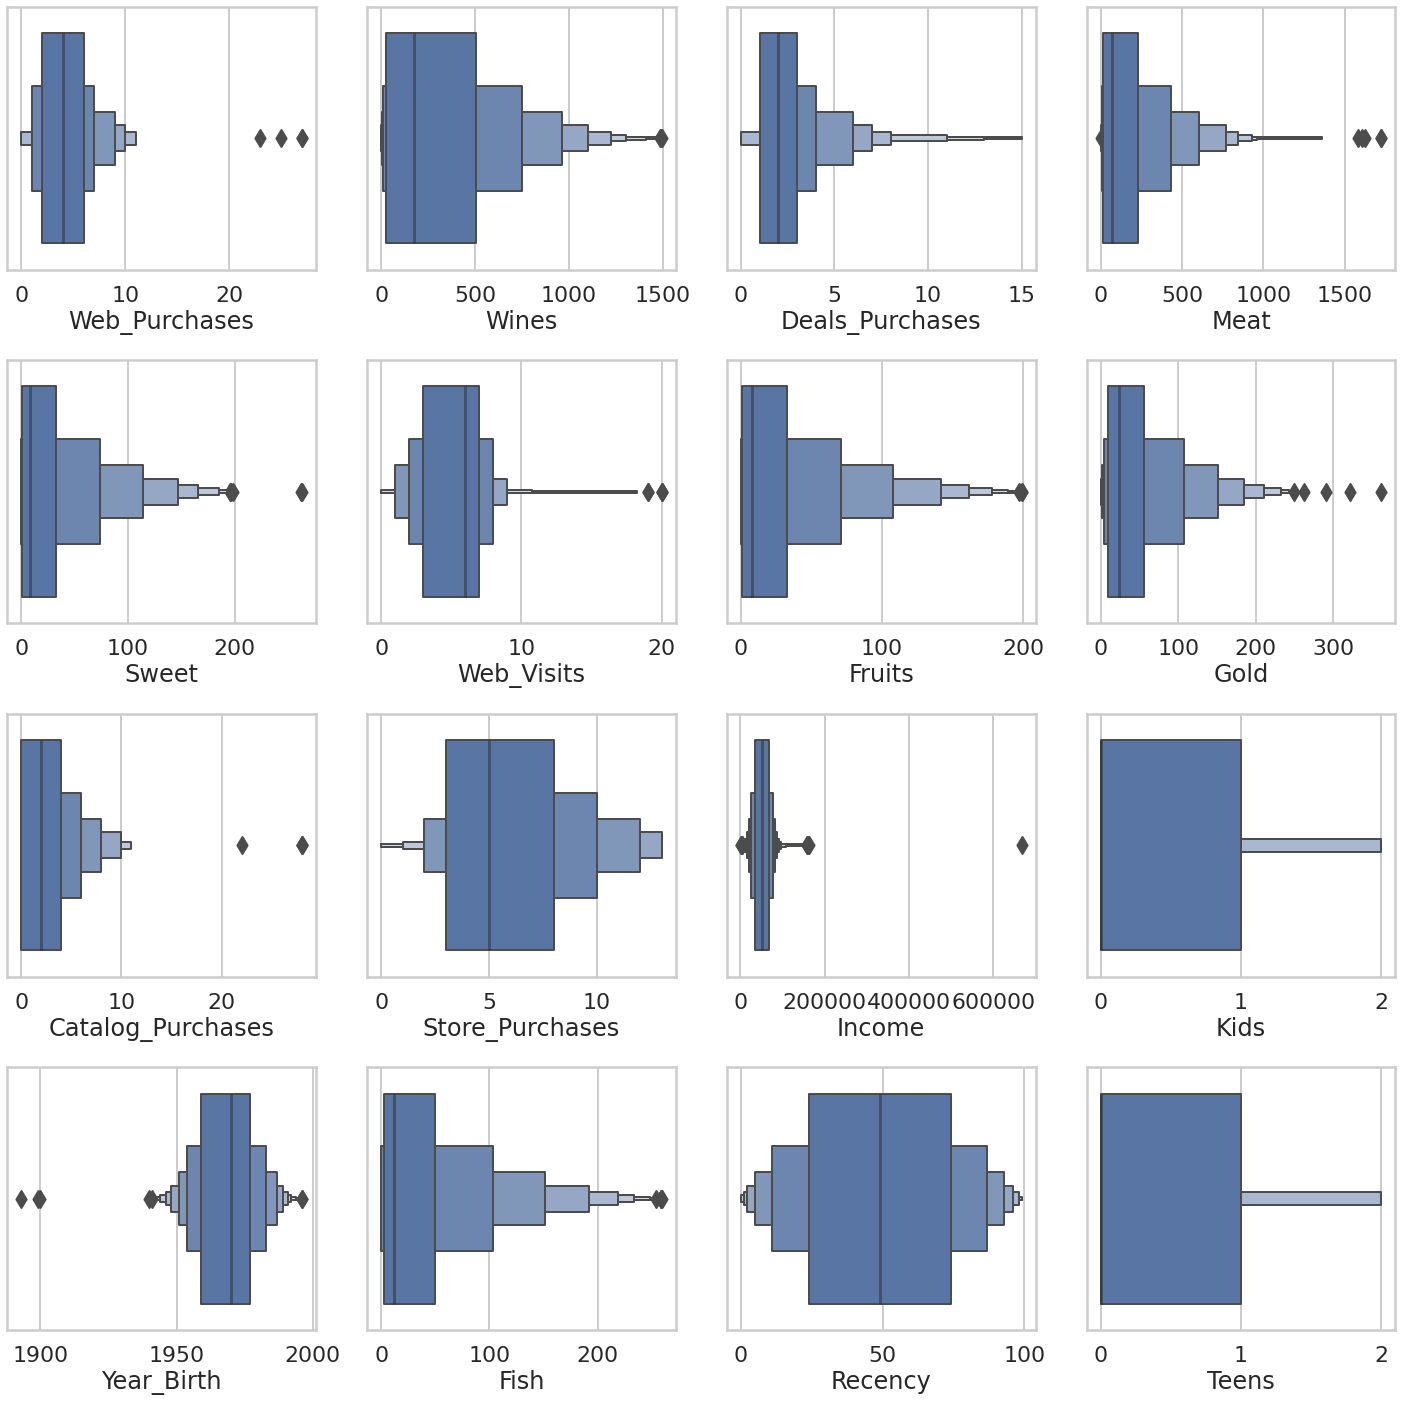

In [77]:
sns.set_theme(context = 'poster', style = 'whitegrid')
          
def boxenplots_eda(data):
    fig, ax = plt.subplots(4, 4, figsize=(20, 20))
    ax = ax.flatten()
        
    for ax,feature in zip(ax,numeric_features):
        ax = sns.boxenplot(ax = ax, x = feature, data = data)
        plt.tight_layout()
                
boxenplots_eda(data)

#### We observe some moderate outliers in some features and some extreme outliers. We would like to further see their influence on other features.

In [78]:
data[numeric_features][data['Income'] > 100000].sort_values(by = "Income")

,Web_Purchases,Wines,Deals_Purchases,Meat,Sweet,Web_Visits,Fruits,Gold,Catalog_Purchases,Store_Purchases,Income,Kids,Year_Birth,Fish,Recency,Teens
124,6,722,0,102,72,2,27,168,8,13,101970.0,0,1983,44,69,0
203,7,763,0,138,176,4,29,58,9,10,102160.0,0,1977,76,54,0
252,6,168,1,444,172,2,148,148,9,13,102692.0,0,1974,32,5,0
646,9,1009,0,104,21,3,181,207,8,13,105471.0,0,1970,202,36,0
1898,27,6,0,3,262,1,2,3,0,0,113734.0,0,1945,1,9,0
655,0,1,0,1,1,0,1,1,0,0,153924.0,0,1975,1,81,0
2132,0,2,0,2,1,0,1,1,0,0,156924.0,0,1949,1,85,0
1653,0,1,0,1725,1,1,0,1,28,0,157146.0,0,1977,2,13,0
164,0,20,15,1582,2,0,2,1,22,0,157243.0,0,1973,1,98,1
1300,1,39,0,9,0,1,1,8,0,1,157733.0,1,1971,2,37,0


#### We note some of the 'Income' outliers have a moderate to extreme effect on other features. These look plausible and can be segregrated as a separate category as well. Hence we will not remove them except for one value which looks like an extreme outlier.

## Histogram

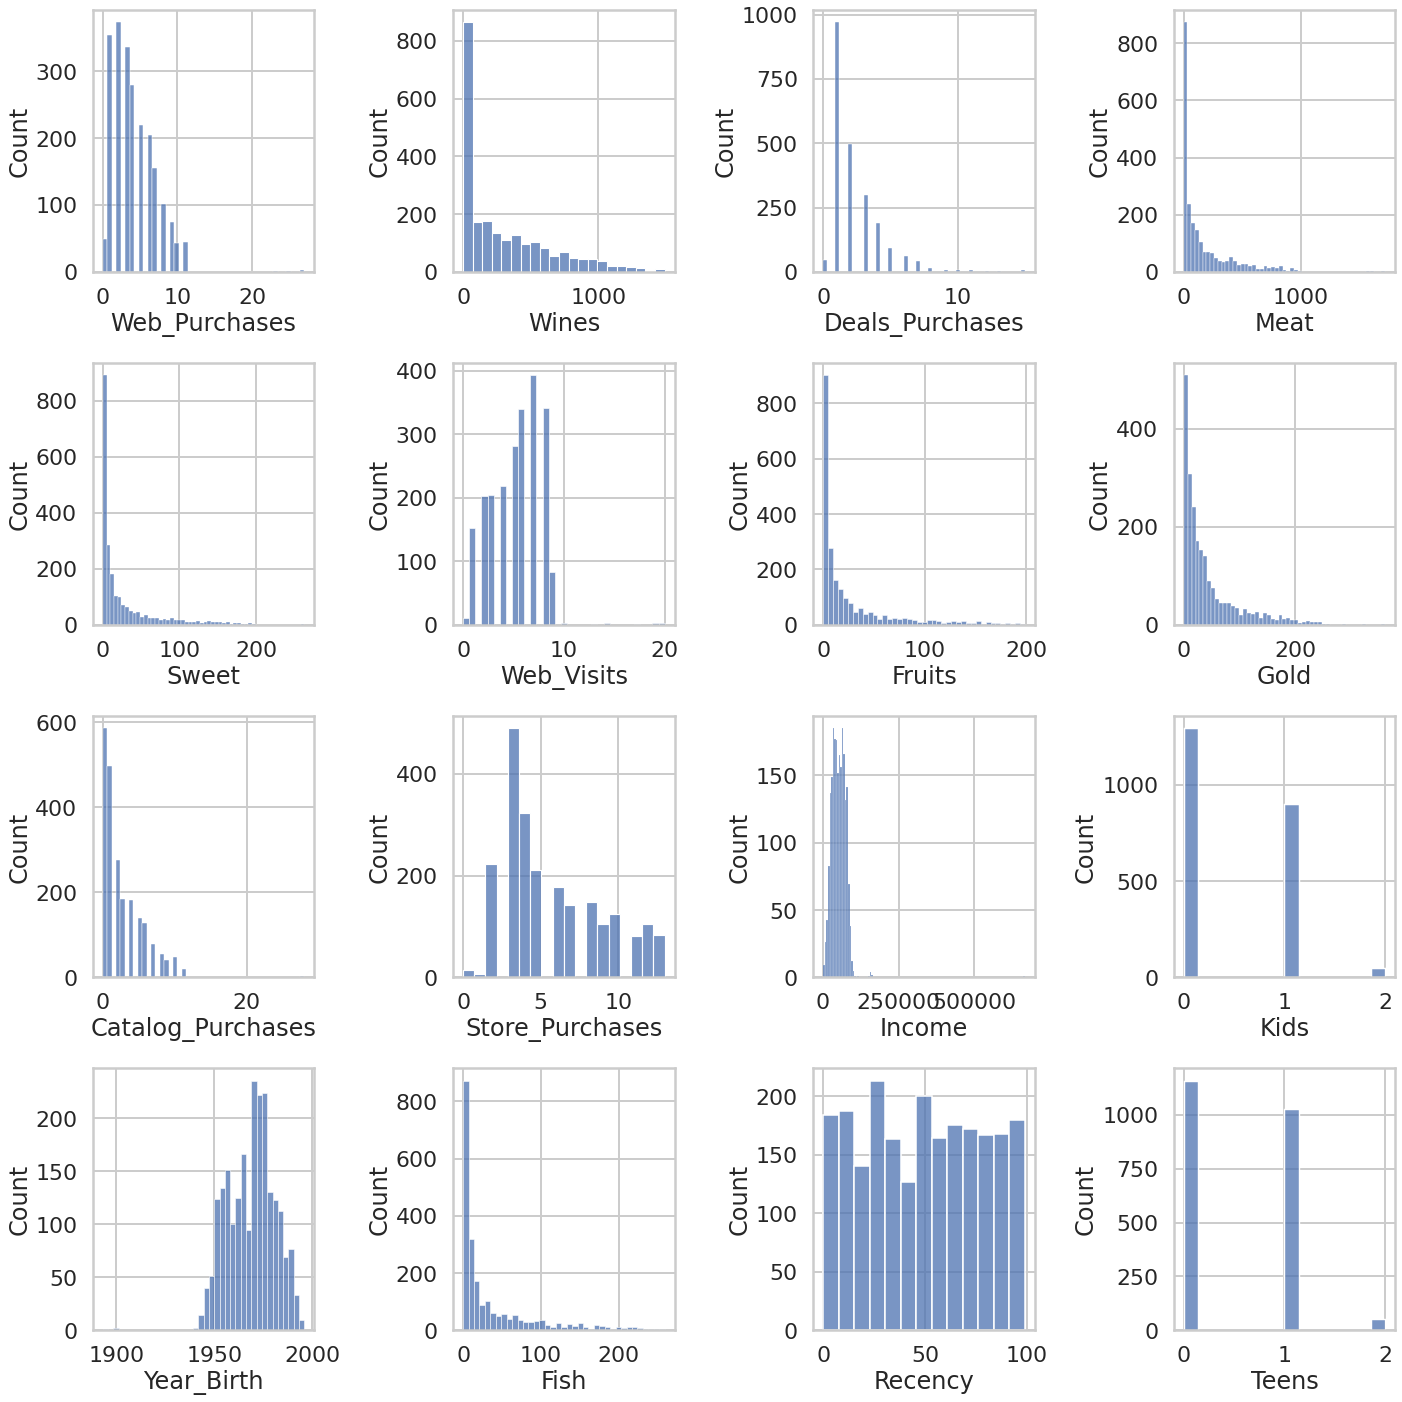

In [79]:
def histogram_eda(data):
    fig, ax = plt.subplots(4, 4, figsize=(20, 20))
    ax = ax.flatten()
        
    for ax,feature in zip(ax,numeric_features):
        ax = sns.histplot(ax = ax, x = feature, data = data)
        plt.tight_layout()
                
histogram_eda(data)

#### We observe most of the features in our data are heavily skewed and the outliers look plausible and are not faulty. We will try to use a transformation technique to fix them. This will further help in increasing the speed and effectiveness of our dimensionality reduction, clustering algorithms as well.

#### Feature 'Income' and 'Year Birth' seem to have extreme outliers. We will plot a histogram for them again to see them in more detail.

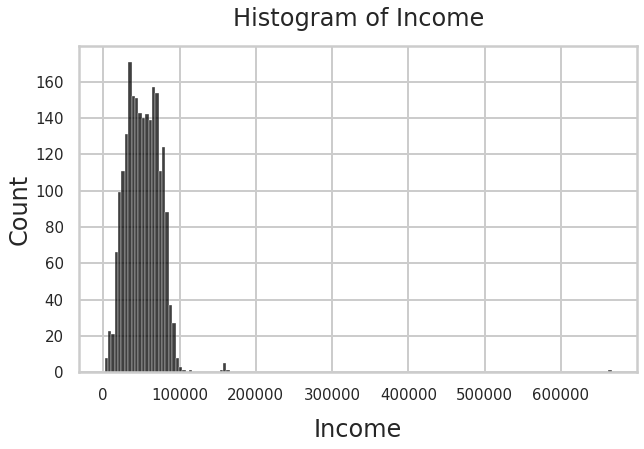

In [80]:
# Histogram for Income

plt.figure(figsize = (10,6))
ax = sns.histplot(data['Income'], bins = 150, color = 'Black')
ax.set_title("Histogram of Income", pad = 20)
ax.xaxis.labelpad = 15
ax.xaxis.set_tick_params(labelsize = 15)
ax.yaxis.set_tick_params(labelsize = 15)
plt.show()

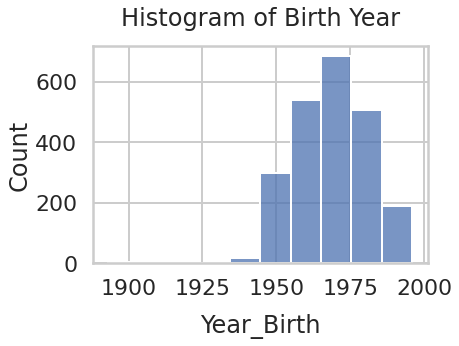

In [81]:
# Historm for Year_Birth

ax = sns.histplot(data['Year_Birth'], bins = 10)
ax.set_title("Histogram of Birth Year", pad = 20)
ax.xaxis.labelpad = 15
plt.show()

    
#### We infer that in feature 'Income' except for the customer with the highest income(isolate value), others look plausible and also have a decent number to form a separate cluster/segregation that we can target.

#### We also note some extreme outliers in Year_Birth. We will change the feature to 'Age' (add a new feature) and it will be easier to identify then if those are plausible or not.

In [82]:
# Removing value with highest income 

data.drop(data["Income"].idxmax(), inplace = True)

#### We drop the row with highest value of income as it was an extreme outlier and not suitable for our purpose/objective

In [83]:
data["Income"].sort_values(ascending = False)

617     162397.0
687     160803.0
1300    157733.0
164     157243.0
1653    157146.0
          ...   
2078         NaN
2079         NaN
2081         NaN
2084         NaN
2228         NaN
Name: Income, Length: 2239, dtype: float64

----

# Features Selection And Exploration

#### We know we have 2 object type variables, which will either need binary, ordinal or one-hot encoding.

In [84]:
data.select_dtypes('object').columns

Index(['Education', 'Status'], dtype='object')

#### Checking the count of the 2 categorical variables

In [85]:
data["Education"].value_counts()

Graduation    1126
PhD            486
Master         370
2n Cycle       203
Basic           54
Name: Education, dtype: int64

#### For easier interpretation we can segregate 'Education' into 3 catgeories, i.e. Undergraduate, Graduate and Postgraduate

In [86]:
#Segregrating education levels into three groups

data["Education"].replace({"Basic":"Undergraduate","2n Cycle":"Undergraduate",
                            "Graduation":"Graduate", "Master":"Postgraduate", 
                            "PhD":"Postgraduate"}, inplace = True)

In [87]:
data["Education"].value_counts()

Graduate         1126
Postgraduate      856
Undergraduate     257
Name: Education, dtype: int64

In [88]:
data["Status"].value_counts()

Married     864
Together    579
Single      480
Divorced    232
Widow        77
Alone         3
YOLO          2
Absurd        2
Name: Status, dtype: int64

#### Here we notice some value counts are very low. Hence we can segregrate the values into 2 types i.e. Single and Couple.

In [89]:
# Segregrating values for status by "Alone" and "Couple"

data["Status"].replace({"Married":"Couple", "Together":"Couple", "Absurd":"Alone", 
                                "Widow":"Alone", "YOLO":"Alone", "Divorced":"Alone", 
                                "Single":"Alone"}, inplace = True)

### New Feature Age

#### As mentioned earlier, we will create a new feature 'Age' using the feature 'Year_Birth' as it will help in easier interpreation of the data as well of outliers.
#### We will subtract it from 2014 as the data was taken in that year itself.

In [90]:
data['Age'] = 2014 - data['Year_Birth']
data['Age'].sort_values(ascending = True)

1170     18
46       18
747      19
2213     19
995      19
       ... 
424      73
1950     74
192     114
339     115
239     121
Name: Age, Length: 2239, dtype: int64

#### We observe the last 3 maximum values are outliers which are most probably false entries as we know oldest person to ever lived was 122 years old. Hence, we can remove these values and impute them.

In [91]:
# Replacing outlier value by median

data['Age'].loc[data['Age'] > 113] = data['Age'].median()

### New Feature Seniority

#### As the data is for 2 years, we can create a new integer type column 'Seniority' from Dt_Customer (Date of enrollment) representing the customers seniority.

In [92]:
data['Seniority'] = (data['Dt_Customer'].max() - data["Dt_Customer"]).dt.days
data['Seniority']

0       663
1       113
2       312
3       139
4       161
       ... 
2235    381
2236     19
2237    155
2238    156
2239    622
Name: Seniority, Length: 2239, dtype: int64

### New Feature Total_Children

#### We will also make a new feature called 'Total_Children' using features 'Kidhome'and 'Teenhome' and thus replace them, thus further reducing our dimensionality features and also suiting out purpose/goal.

In [93]:
data['Kids'].value_counts()

0    1293
1     898
2      48
Name: Kids, dtype: int64

In [94]:
data['Teens'].value_counts()

0    1157
1    1030
2      52
Name: Teens, dtype: int64

In [95]:
data["Total_Children"] = data["Kids"] + data["Teens"]

data["Total_Children"].value_counts().sort_index()

0     638
1    1127
2     421
3      53
Name: Total_Children, dtype: int64

### Removing redundant features

#### After creating the new features, we can remove the redundant ones, i.e. 'Year_birth', 'Dt_Customer', 'Kids' and 'Teens'

In [96]:
data.drop(columns = ['Year_Birth', 'Dt_Customer', 'Kids', 'Teens'], inplace = True)
data.shape

(2239, 25)

---

# Missing Values

##### Checking  for missing values

In [97]:
data.isnull().sum()

Education             0
Status                0
Income               24
Recency               0
Wines                 0
Fruits                0
Meat                  0
Fish                  0
Sweet                 0
Gold                  0
Deals_Purchases       0
Web_Purchases         0
Catalog_Purchases     0
Store_Purchases       0
Web_Visits            0
Cmp3                  0
Cmp4                  0
Cmp5                  0
Cmp1                  0
Cmp2                  0
Complain              0
Response              0
Age                   0
Seniority             0
Total_Children        0
dtype: int64

#### Only income has 24 missing values. We will further analyze to see if there is any pattern for missing values

In [98]:
data.loc[data['Income'].isnull() == True]

,Education,Status,Income,Recency,Wines,Fruits,Meat,Fish,Sweet,Gold,...,Cmp3,Cmp4,Cmp5,Cmp1,Cmp2,Complain,Response,Age,Seniority,Total_Children
10,Graduate,Couple,NaN,11,5,5,6,0,2,1,...,0,0,0,0,0,0,0,31,226,1
27,Graduate,Alone,NaN,19,5,1,3,3,263,362,...,0,0,0,0,0,0,0,28,494,1
43,Postgraduate,Alone,NaN,80,81,11,50,3,2,39,...,0,0,0,0,0,0,0,55,236,0
48,Graduate,Alone,NaN,96,48,5,48,6,10,7,...,0,0,0,0,0,0,0,63,179,3
58,Graduate,Alone,NaN,57,11,3,22,2,2,6,...,0,0,0,0,0,0,0,32,377,1
71,Undergraduate,Couple,NaN,25,25,3,43,17,4,17,...,0,0,0,0,0,0,0,41,653,1
90,Postgraduate,Couple,NaN,4,230,42,192,49,37,53,...,0,0,0,0,0,0,0,57,587,3
91,Graduate,Alone,NaN,45,7,0,8,2,0,1,...,0,0,0,0,0,0,0,57,33,2
92,Postgraduate,Couple,NaN,87,445,37,359,98,28,18,...,0,0,0,0,0,0,0,41,218,0
128,Postgraduate,Couple,NaN,23,352,0,27,10,0,15,...,0,0,0,0,0,0,0,53,353,1


#### We observe there is no pattern in missing values , hence we will use multiple imputation to fill them.

----

 # Data Preprocessing

#### Now we need to make sure that all of our data types are numeric (integer/float data type) before using multple imputation. Hence, we encode our object data type to integer type.

#### We will use One-Hot Encoding as the object features are not ordinal for our scenario/goal

#### (Note: Education, Age_Groups can be considered ordinal depending on the objective. E.g. Age_Groups can be considered ordinal, if our goal was related to health analysis)

## One-Hot Encoding

In [99]:
enc_df = pd.get_dummies(data, drop_first = True)

In [100]:
enc_df.columns

Index(['Income', 'Recency', 'Wines', 'Fruits', 'Meat', 'Fish', 'Sweet', 'Gold',
       'Deals_Purchases', 'Web_Purchases', 'Catalog_Purchases',
       'Store_Purchases', 'Web_Visits', 'Cmp3', 'Cmp4', 'Cmp5', 'Cmp1', 'Cmp2',
       'Complain', 'Response', 'Age', 'Seniority', 'Total_Children',
       'Education_Postgraduate', 'Education_Undergraduate', 'Status_Couple'],
      dtype='object')

In [101]:
enc_df

,Income,Recency,Wines,Fruits,Meat,Fish,Sweet,Gold,Deals_Purchases,Web_Purchases,...,Cmp1,Cmp2,Complain,Response,Age,Seniority,Total_Children,Education_Postgraduate,Education_Undergraduate,Status_Couple
0,58138.0,58,635,88,546,172,88,88,3,8,...,0,0,0,1,57,663,0,0,0,0
1,46344.0,38,11,1,6,2,1,6,2,1,...,0,0,0,0,60,113,2,0,0,0
2,71613.0,26,426,49,127,111,21,42,1,8,...,0,0,0,0,49,312,0,0,0,1
3,26646.0,26,11,4,20,10,3,5,2,2,...,0,0,0,0,30,139,1,0,0,1
4,58293.0,94,173,43,118,46,27,15,5,5,...,0,0,0,0,33,161,1,1,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2235,61223.0,46,709,43,182,42,118,247,2,9,...,0,0,0,0,47,381,1,0,0,1
2236,64014.0,56,406,0,30,0,0,8,7,8,...,1,0,0,0,68,19,3,1,0,1
2237,56981.0,91,908,48,217,32,12,24,1,2,...,0,0,0,0,33,155,0,0,0,0
2238,69245.0,8,428,30,214,80,30,61,2,6,...,0,0,0,0,58,156,1,1,0,1


---

## Multiple Imputation

#### Now we can use multiple imputation for missing values, as all of our object data types have been convered to numerical (integer or float data type).

In [102]:
imputer = IterativeImputer(random_state = 5, min_value = 0)
imputer.fit(enc_df)
imputed_data = imputer.transform(enc_df)
imputed_df = pd.DataFrame(imputed_data, columns = enc_df.columns)

In [103]:
imputed_df.isnull().sum().sum()

0

#### We confirm all null values have been imputed

---

# Feature Transformation

---

## Skewness

#### We know our dataset has many skewed features. We will set a limit of 0.75 for skewness and check which columns are skewed

In [104]:
# Selecting non-binary and numeric features 
numeric_features = list(set(imputed_df.columns) - set(binary_features) - {'Education_Graduate', 
                                                                'Education_Postgraduate', 'Education_Undergraduate', 
                                                                'Status_Alone', 'Status_Couple'})

skew_limit = 0.75
skew_vals = imputed_df[numeric_features].skew()
skew_cols = skew_vals[abs(skew_vals) > skew_limit].sort_values(ascending = False)
skew_cols_name = skew_cols.index.values

print(f"Columns skewed more than 0.75: {skew_cols_name}")

Columns skewed more than 0.75: ['Deals_Purchases' 'Sweet' 'Fruits' 'Meat' 'Fish' 'Gold'
 'Catalog_Purchases' 'Web_Purchases' 'Wines']


# Log1p Transformation

#### After imputation we can finally apply log1p transformation We will be using log1p transforation since the minimum value is 0 for some of the features.

#### The transformation will make our data more normal and help in treatment of our outliers. It will also help us in avoiding higher influence of tails/outliers on our clustering and dimensionality reduction algorithms , since our goal requires to focus on all the segments on average and their individual influence. This in turn will improve the algorithms effectiveness and speed.

In [105]:
# log1p transforation since minimum values is 0 for some of the features

for cols in skew_cols_name:
    imputed_df[cols] = np.log1p(imputed_df[cols])

In [106]:
skew_vals = imputed_df[numeric_features].skew()
skew_cols = skew_vals[abs(skew_vals) > skew_limit].sort_values(ascending = False)
skew_cols_name = skew_cols.index.values

print(f"Columns skewed more than 0.75: {skew_cols_name}")

Columns skewed more than 0.75: []


#### We confirm we have no more skewed features in our dataset

#### Using boxen plots for checking of outliers after log1p transformation

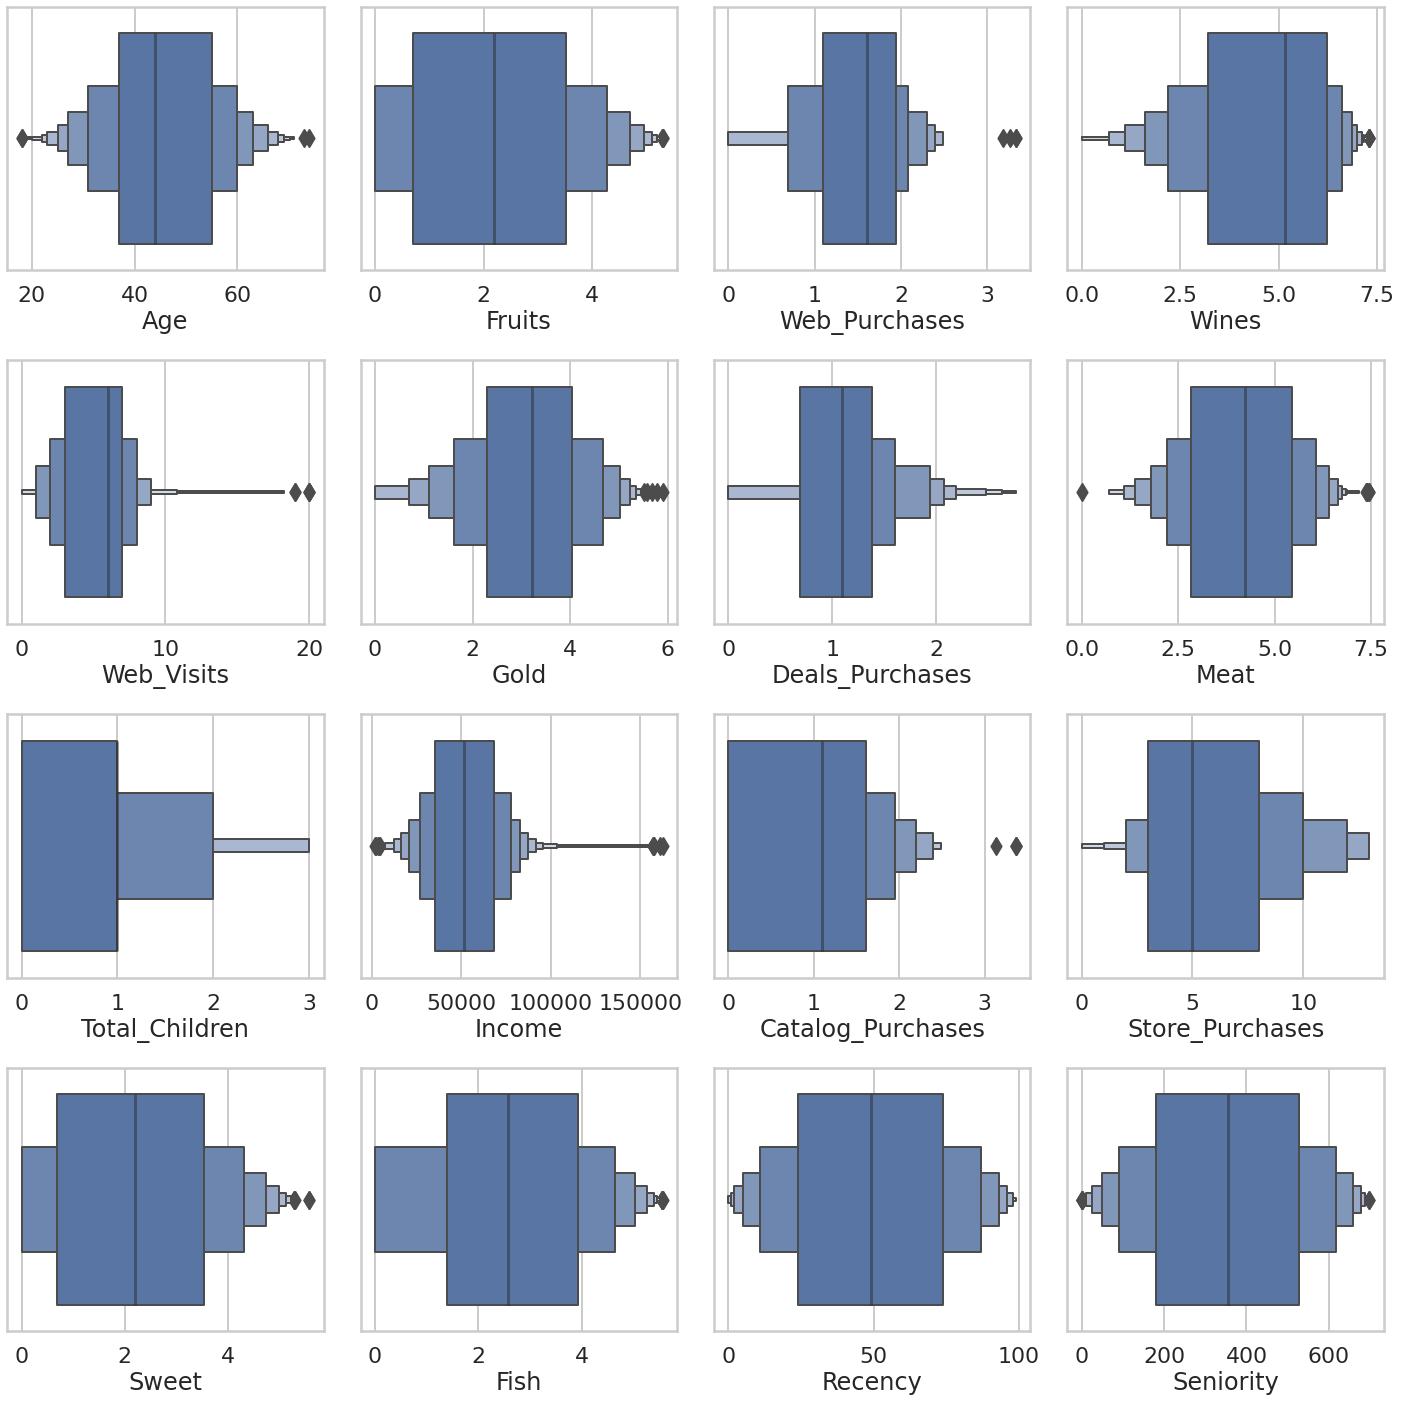

In [107]:
boxenplots_eda(imputed_df)

#### We note we still have some outliers left in our dataset

----------------------
# Correlation of Variables
----------------------

#### We can finally check for correlation after treatment of outliers as they affect collinearity. We remove highly correlated features to increase speed and for reducing storage(curse of dimensionality). 

#### Also even though we will be using PCA to remove features, it will be automatic and not using any theoretical knowledge/literature and we ourselves can manually choose to remove the features we think would be lesser interpretable and useful in the model in comparison to the other.

# Correlation Plot of Variables - Heatmap

We will plot heatmap of features having correlation with respect to 'Income' in descending order. 

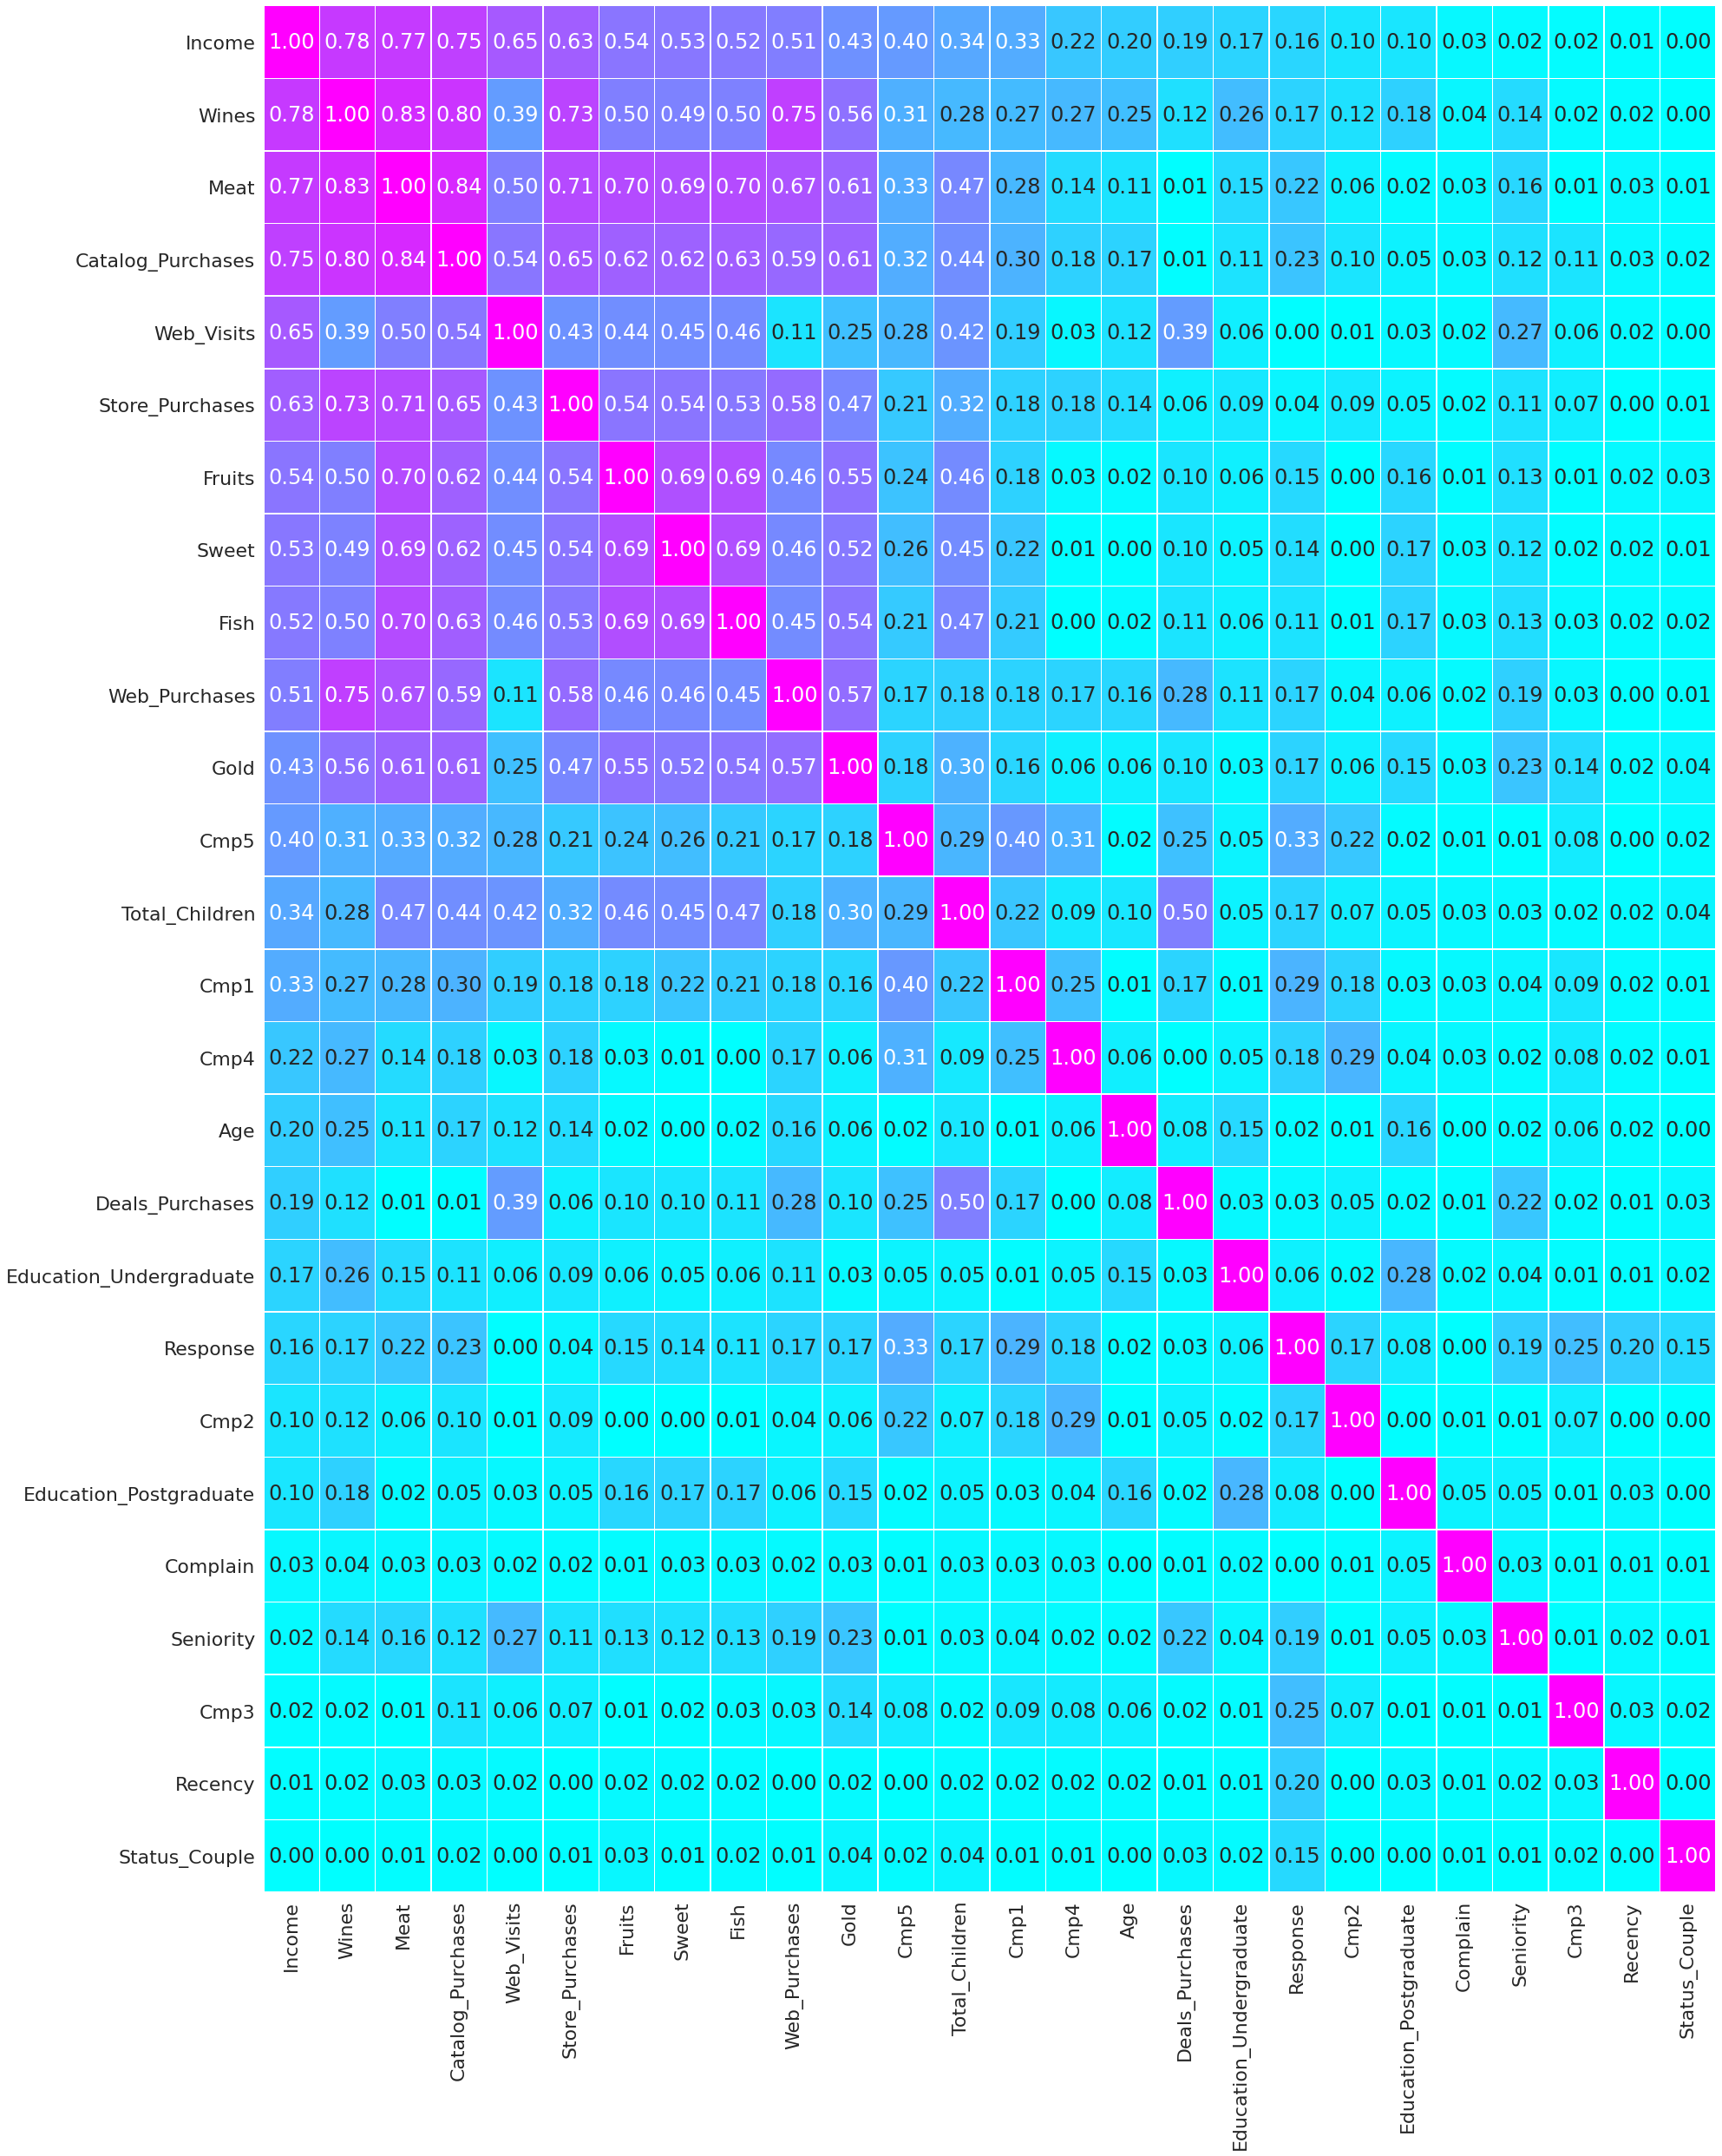

In [108]:
plt.figure(figsize = (30, 40))
sns.set(font_scale=2)

# We use abs to see maximum value of correlation with status (+ or -) 
corr_map = abs(imputed_df.corr())
corr_cols = corr_map.nlargest(26,'Income')['Income'].index
coff_val = np.corrcoef(imputed_df[corr_cols].values, rowvar = False)
sns.heatmap(abs(coff_val), annot = True, cbar = False, linewidths=.5, cmap = plt.cm.cool, fmt='.2f',
           xticklabels = corr_cols.values, yticklabels = corr_cols.values) 
           
plt.show()

---

# Feature Scaling (Robust Transformation)

---

#### We know our dataset has still has number of outliers left, hence we will apply robust scaling to normalize the data features.

#### This is useful for algorithms (K-Means Clustering, PCA, etc) which are based on measures like distance. Also it can speed up our algorithm and suppress the affect of remaining outliers.

In [109]:
scaler = RobustScaler()
scaler.fit(imputed_df)
scaled_df = pd.DataFrame(scaler.transform(imputed_df),columns= imputed_df.columns)

In [110]:
scaled_df.describe()

,Income,Recency,Wines,Fruits,Meat,Fish,Sweet,Gold,Deals_Purchases,Web_Purchases,...,Cmp1,Cmp2,Complain,Response,Age,Seniority,Total_Children,Education_Postgraduate,Education_Undergraduate,Status_Couple
count,2239.000000,2239.000000,2239.000000,2239.000000,2239.000000,2239.000000,2239.000000,2239.000000,2239.000000,2239.000000,...,2239.000000,2239.000000,2239.000000,2239.000000,2239.000000,2239.000000,2239.000000,2239.000000,2239.000000,2239.000000
mean,0.020291,0.002421,-0.163066,0.014659,-0.035243,-0.011777,0.015216,-0.056014,-0.029409,-0.155793,...,0.064314,0.013399,0.009379,0.149174,0.061138,-0.004118,-0.049576,0.382314,0.114783,-0.355516
std,0.648397,0.579273,0.599946,0.554406,0.596418,0.651211,0.562677,0.740293,0.679873,0.663231,...,0.245367,0.115001,0.096412,0.356339,0.649750,0.580103,0.751970,0.486061,0.318832,0.478776
min,-1.495135,-0.980000,-1.717775,-0.775524,-1.611837,-1.007628,-0.775524,-1.849433,-1.584963,-1.899495,...,0.000000,0.000000,0.000000,0.000000,-1.444444,-1.018651,-1.000000,0.000000,0.000000,-1.000000
25%,-0.482811,-0.500000,-0.647197,-0.530873,-0.529560,-0.463029,-0.530873,-0.526463,-0.584963,-0.602888,...,0.000000,0.000000,0.000000,0.000000,-0.388889,-0.500717,-1.000000,0.000000,0.000000,-1.000000
50%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,0.517189,0.500000,0.352803,0.469127,0.470440,0.536971,0.469127,0.473537,0.415037,0.397112,...,0.000000,0.000000,0.000000,0.000000,0.611111,0.499283,0.000000,1.000000,0.000000,0.000000
max,3.352190,1.000000,0.713223,1.094550,1.235397,1.176859,1.192542,1.537247,2.415037,2.033248,...,1.000000,1.000000,1.000000,1.000000,1.666667,0.987088,2.000000,1.000000,1.000000,0.000000


---

# Feature Reduction (Principal Component Analysis)

---

#### In order for our algorithm to work better and faster, we will try to reduce the number of features using linear PCA.

#### For our project, we will need a variance of about 0.7. We will first check our PCA for a range of 10 components and then see its explained variance ratio, to know how many features can our data set be reduced to.

In [111]:
pca_list = list()
feature_weight_list = list()

# Fit a range of PCA models upto 10 components

for n in range(1, 11):
    
    # Create and fit the model
    
    PCAmod = PCA(n_components=n, random_state = 5)
    PCAmod.fit(scaled_df)
    
    # Store the model and variance
    
    pca_list.append(pd.Series({'n':n, 'model':PCAmod,
                               'var': PCAmod.explained_variance_ratio_.sum()}))
    
    # Calculate and store feature importances
    
    weights = PCAmod.explained_variance_ratio_.reshape(-1,1)/PCAmod.explained_variance_ratio_.sum()
    overall_contributions = np.abs(PCAmod.components_) * weights
    abs_feature_values = overall_contributions.sum(axis=0)
    feature_weight_list.append(pd.DataFrame({'n':n, 
                                             'features': scaled_df.columns,
                                             'values':abs_feature_values/abs_feature_values.sum()}))
    
pca_df = pd.concat(pca_list, axis=1).T.set_index('n')

pca_df

,model,var
n,,
1,"PCA(n_components=1, random_state=5)",0.377629
2,"PCA(n_components=2, random_state=5)",0.50161
3,"PCA(n_components=3, random_state=5)",0.582143
4,"PCA(n_components=4, random_state=5)",0.63159
5,"PCA(n_components=5, random_state=5)",0.678235
6,"PCA(n_components=6, random_state=5)",0.7218
7,"PCA(n_components=7, random_state=5)",0.75674
8,"PCA(n_components=8, random_state=5)",0.78861
9,"PCA(n_components=9, random_state=5)",0.818627


#### Checking the importance of features, with respect to number of components 

In [112]:
features_df = (pd.concat(feature_weight_list)
               .pivot(index='n', columns='features', values='values'))

features_df

features,Age,Catalog_Purchases,Cmp1,Cmp2,Cmp3,Cmp4,Cmp5,Complain,Deals_Purchases,Education_Postgraduate,...,Recency,Response,Seniority,Status_Couple,Store_Purchases,Sweet,Total_Children,Web_Purchases,Web_Visits,Wines
n,,,,,,,,,,,,,,,,,,,,,
1,0.015008,0.067275,0.012059,0.001455,0.000893,0.006935,0.014873,0.000519,0.009539,0.001627,...,0.001664,0.011864,0.013104,0.001598,0.081146,0.068801,0.067268,0.074821,0.057136,0.080337
2,0.023459,0.054729,0.011769,0.001262,0.000957,0.006592,0.015398,0.000495,0.049988,0.004779,...,0.002210,0.009799,0.025490,0.002433,0.070855,0.058142,0.085458,0.081077,0.065173,0.075781
3,0.040322,0.049344,0.010827,0.001318,0.002122,0.007594,0.014272,0.000507,0.046622,0.015851,...,0.002103,0.010447,0.035168,0.003195,0.065315,0.055994,0.081454,0.070252,0.067000,0.072860
4,0.037775,0.046150,0.011009,0.001652,0.003004,0.008507,0.014466,0.000540,0.045447,0.020961,...,0.017413,0.015303,0.037908,0.004234,0.060661,0.055085,0.082158,0.068132,0.066781,0.070266
5,0.048172,0.043537,0.010614,0.001638,0.002938,0.008154,0.013789,0.000572,0.046741,0.020218,...,0.023484,0.015259,0.044258,0.005665,0.060170,0.053051,0.083226,0.064891,0.066493,0.066961
6,0.053047,0.041467,0.010423,0.001835,0.002854,0.009218,0.013984,0.000564,0.044412,0.024641,...,0.031479,0.014463,0.044579,0.005707,0.058600,0.051959,0.081156,0.063161,0.064474,0.066073
7,0.051727,0.039986,0.010562,0.002021,0.004622,0.009347,0.013881,0.000613,0.043737,0.024265,...,0.031538,0.015180,0.048360,0.009924,0.059166,0.052085,0.078083,0.062620,0.061965,0.063817
8,0.051086,0.039273,0.010403,0.001982,0.004533,0.009037,0.013859,0.000646,0.042603,0.023528,...,0.030530,0.016971,0.050277,0.018381,0.057709,0.050913,0.079101,0.063477,0.061645,0.061803
9,0.050345,0.038490,0.010675,0.002125,0.005185,0.009007,0.014496,0.000645,0.043700,0.023041,...,0.029618,0.017275,0.052190,0.022593,0.057284,0.049887,0.079679,0.063398,0.061028,0.059854


#### We will reduce our number of features to 6 as its value is close to the explained variance limit of 0.7

In [113]:
PCAmod = PCA(n_components = 6)
PCAmod.fit(scaled_df)

PCA(n_components=6)

--------------------------------------------------------------------------

# Clustering

#### After reducing out features we can finally apply clustering techniques to our data set.
#### We have to segregrate our data to gain an insight on customer behaviour and improve our knowledge on how to target our customers better.

#### We will be trying 2 different clustering algorithms and evaluating their performance.

## K-Means Clustering

#### We will use distortion and silhouette score as our metrics to help us identify an appropriate value of number of clusters for k-means clustering.
#### Note: Distortion will be used as a metric and not inertia as similarity of points in the cluster is more important to us rather than having similar number of points in the cluster

In [114]:
# Defining a function to calculate distortion

def km_distortion(cluster_centers):
    return sum(np.square(np.min(cdist(scaled_df, cluster_centers,
                                   'euclidean'), axis=1))) / scaled_df.shape[0]    

In [115]:
# Taking a range of upto 20 for number of clusters to find an appropriate value.
# Note: We start from 2 no. of clusters as silhouette score requires at least 2 clusters to work

km_list = list()

for cluster in range(2,21):
    km_model = KMeans(n_clusters = cluster, random_state = 5, init = 'k-means++', n_init = 20)
    km_model = km_model.fit(scaled_df) 
    cluster_labels = km_model.predict(scaled_df)
    
    km_list.append(pd.Series({'clusters' : cluster, 
                              'distortion' : km_distortion(km_model.cluster_centers_),
                              'silhouette_score' : silhouette_score(scaled_df, cluster_labels)
                             }))

In [116]:
pd.DataFrame(km_list)

,clusters,distortion,silhouette_score
0,2.0,5.142707,0.257692
1,3.0,4.502631,0.193537
2,4.0,4.264146,0.142359
3,5.0,4.067191,0.112749
4,6.0,3.942779,0.113637
5,7.0,3.840415,0.105030
6,8.0,3.744716,0.093791
7,9.0,3.673350,0.093647
8,10.0,3.608285,0.091757
9,11.0,3.557663,0.085340


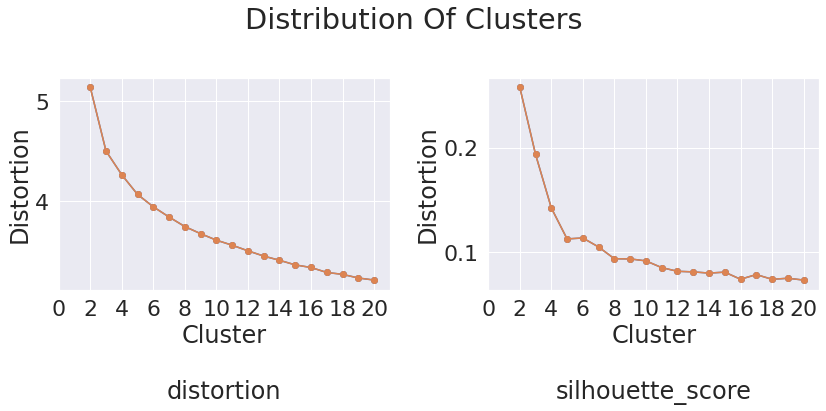

In [117]:
fig, ax = plt.subplots(nrows=1, ncols=2, figsize=(12, 6))

km_plot = pd.DataFrame(km_list)[['clusters','distortion']].set_index('clusters')

km_metric_score = ['distortion', "silhouette_score"]

for i in range(2):
    km_plot = pd.DataFrame(km_list)[['clusters', km_metric_score[i]]].set_index('clusters')
    ax[i].plot(km_plot, marker='o',ls='-')
    ax[i].plot(km_plot, marker='o',ls='-')
    ax[i].set_xticks(range(0,21,2))
    ax[i].set_xlim(0,21)
    ax[i].set(xlabel="{0}\n\n{1}".format("Cluster", km_metric_score[i]), ylabel='Distortion')
        
    plt.suptitle("Distribution Of Clusters")
    plt.tight_layout()

#### From silhouette score and elbow curve, we observe no of clusters = 4 is the most optimum value for us and for our goal

In [118]:
# Fitting km_model with 4 no of clusters

km_model = KMeans(n_clusters = 4, random_state = 5, init = 'k-means++')
km_model = km_model.fit_predict(scaled_df)

In [119]:
# Checkign the counts of our clusters

(unique, counts) = np.unique(km_model, return_counts=True)
frequencies = np.asarray((unique, counts)).T

frequencies

array([[  0, 647],
       [  1, 692],
       [  2, 431],
       [  3, 469]])

## Hierarchical Agglomerative Clustering

#### We will use the same number of clusters as k-means for agglomerative clustering. We can then compare how both of them performed with the same number of clusters.

In [120]:
# Fitting hac_model with 4 no of clusters

hac_model = AgglomerativeClustering(n_clusters = 4, linkage='ward', compute_full_tree = True)
hac_model = hac_model.fit_predict(scaled_df)

In [121]:
# Checkign the counts of our clusters

(unique, counts) = np.unique(hac_model, return_counts=True)
frequencies = np.asarray((unique, counts)).T

frequencies

array([[  0, 800],
       [  1, 448],
       [  2, 432],
       [  3, 559]])

---

In [136]:
# Adding Cluster values/feature of both models to our main dataframe 

model_name = ["km_model", "hac_model"]
models = [km_model, hac_model]
data["km_model"], data["hac_model"] = models

#### Note: We add cluster feature to our main dataframe as it shorten and simplify our code. Also, some plots have a requirement of putting in the value of the dataframe (Only 1) from which we will be plotting and wont work otherwise. (e.g - Catplots)

# Evaluation 

## Distribution Of Clusters

#### We will first compare the cluster count and how they are distributed visually

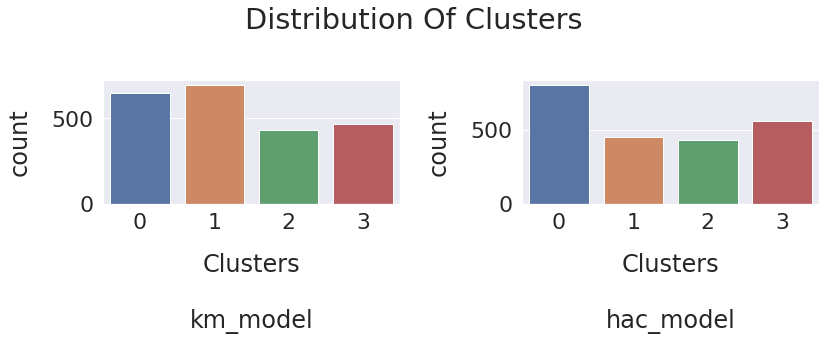

In [142]:
# Plotting countplot of models clusters

def countplots_eva(model_name):
    fig, ax = plt.subplots(1, 2, figsize = (12, 5))
    ax = ax.flatten()
       
    for ax, model in zip(ax, model_name):
        ax = sns.countplot(ax = ax, data = data, x = model)
        ax.set(xlabel = "{0}\n\n{1}".format("Clusters", model))
        ax.xaxis.labelpad = 20
        ax.yaxis.labelpad = 20
        
    plt.suptitle("Distribution Of Clusters")
    plt.tight_layout()
                
countplots_eva(model_name)

#### We observe for km_model clusters ('0' and '1') and clusters (2 and 3) have roughly same counts, and is bimodal.
#### For hac_model cluster '0' has the highest count and cluster (1,2,3) have roughly same counts. It is more skewed and is unimodal.

## Cluster's Profile Based On Income And Spending

#### Now, we will compare the model for income vs money spent on the products. We will create a new feature 'Total_Products and compare the results

In [139]:
# Creating new feature "Total_Products"

data['Tot_Amt_Products'] = (data['Fish'] + data['Wines'] + data['Gold'] + data['Sweet'] + data['Meat'] + 
                          data['Fruits'])

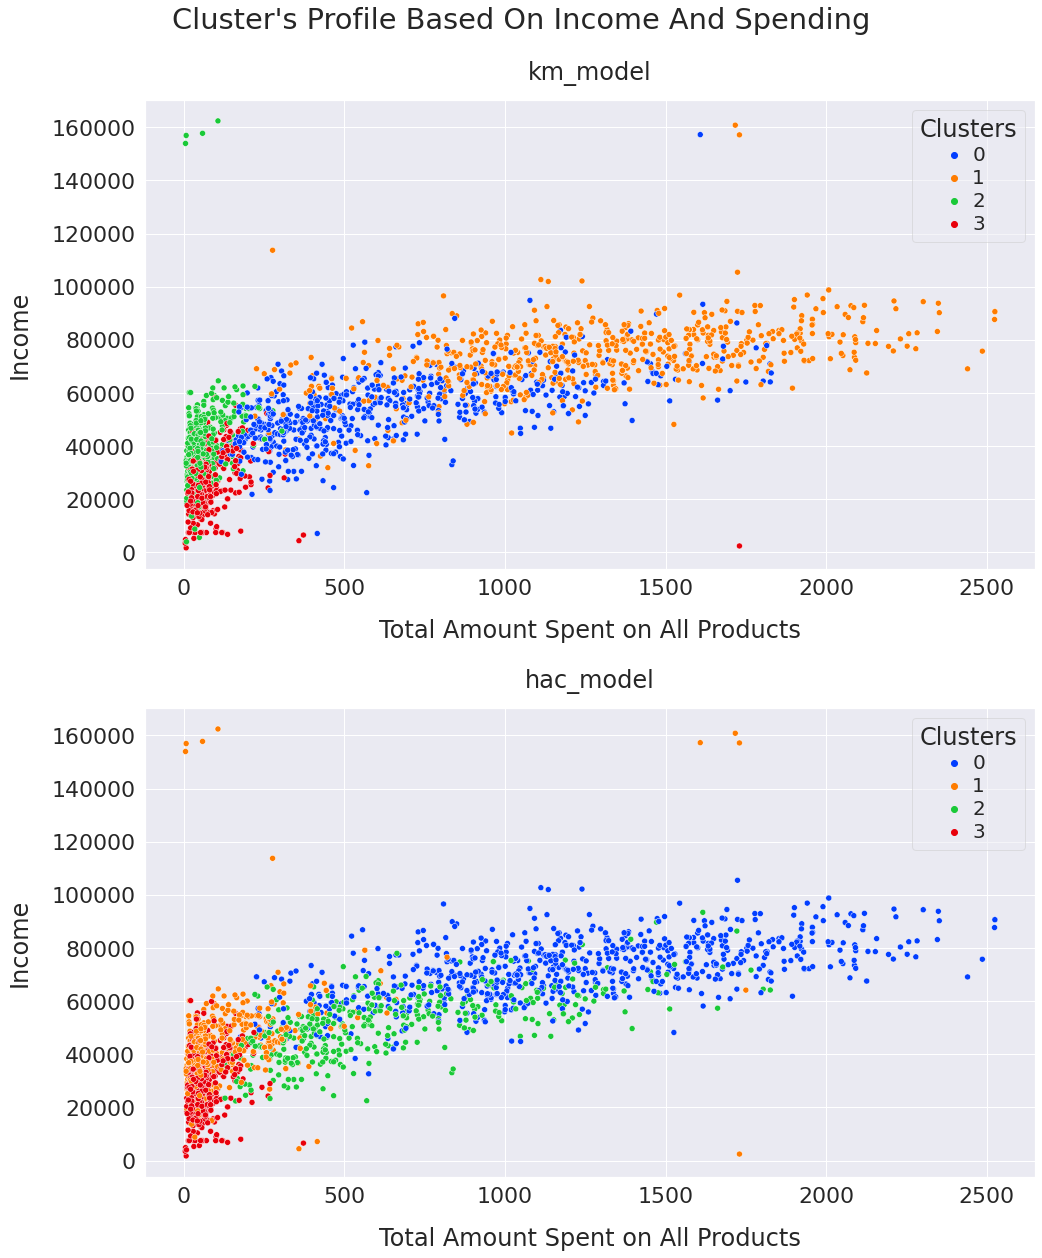

In [140]:
#Plotting 

def scatterplots_eva(model_name):
    fig, ax = plt.subplots(2, 1, figsize = (15, 18))
    ax = ax.flatten()
       
    for ax, model in zip(ax, model_name):
        ax = sns.scatterplot(data = data, ax = ax,  x = "Tot_Amt_Products", y = "Income", 
                             hue = model, palette = "bright")
        
        ax.set(xlabel = "Total Amount Spent on All Products")
        ax.set_title(model, pad = 20)
        ax.xaxis.labelpad = 20
        ax.yaxis.labelpad = 20

        ax.legend(loc="upper right", framealpha= 0.5, fontsize = 'small', handlelength=0.2, 
                  labelspacing=0.2)
        ax.get_legend().set_title("Clusters")   

    plt.suptitle("Cluster's Profile Based On Income And Spending")
    plt.tight_layout()        
                
scatterplots_eva(model_name)

#### Income vs spending plot shows the clusters pattern (km-model)- 
    * Cluster 0 : moderate-high spending & moderate income
    * Cluster 1 : high spending & high income 
    * Cluster 2 : low spending & moderate income
    * Cluster 3 : low spending & low income

#### Income vs spending plot shows the clusters pattern (hac-model)- 
    * Cluster 0 : high spending & high income
    * Cluster 1 : low spending & moderate income
    * Cluster 2 : moderate-high spending & moderate income
    * Cluster 3 : low spending & low income

#### We notice both k-means and hac performed very similarly in segregrting the groups (Cluster numbering is different which isnt relevant)

## Total Amount Spent Cluster Wise

#### We will be looking at the distribution of clusters with respect to total amount spent

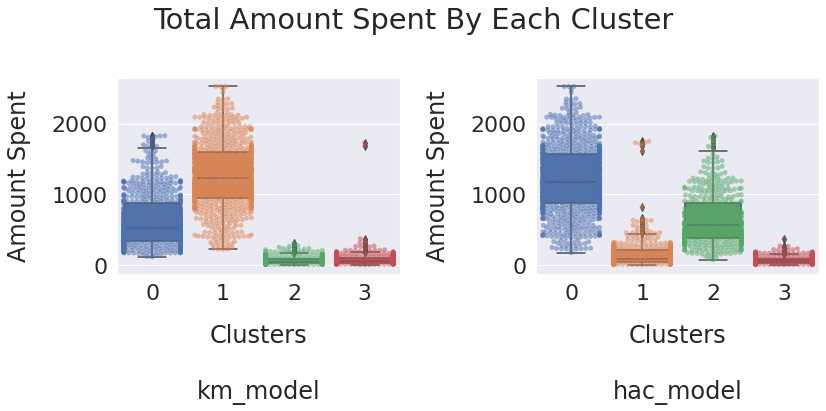

In [143]:
def swarmplots_eva(model_name):
    fig, ax = plt.subplots(1, 2, figsize = (12, 6))
    ax = ax.flatten()
       
    for ax, model in zip(ax, model_name):
        ax = sns.swarmplot(ax = ax, data = data, x = model, y = "Tot_Amt_Products", alpha = 0.5)
        ax = sns.boxplot(ax = ax, data = data, x = model, y = "Tot_Amt_Products")
        ax.set(xlabel = "{0}\n\n{1}".format("Clusters", model))
        ax.set(ylabel = "Amount Spent")
        ax.xaxis.labelpad = 20
        ax.yaxis.labelpad = 20

    plt.suptitle("Total Amount Spent By Each Cluster")
    plt.tight_layout()
                
swarmplots_eva(model_name)

#### We note for k-means model cluster 0 has spent the maximum amount followed by cluster 1.
#### For hac model cluster 0 has spent the maximum amount followed by cluster 2.
    
#### We can further explore what product is each cluster is spending on for the targeted marketing strategies.

## Effect of Promotions

#### Now we will compare the model for effect of promotions. We will create a new feature 'Total_Promotions and compare the results to see how many promotions were accepted

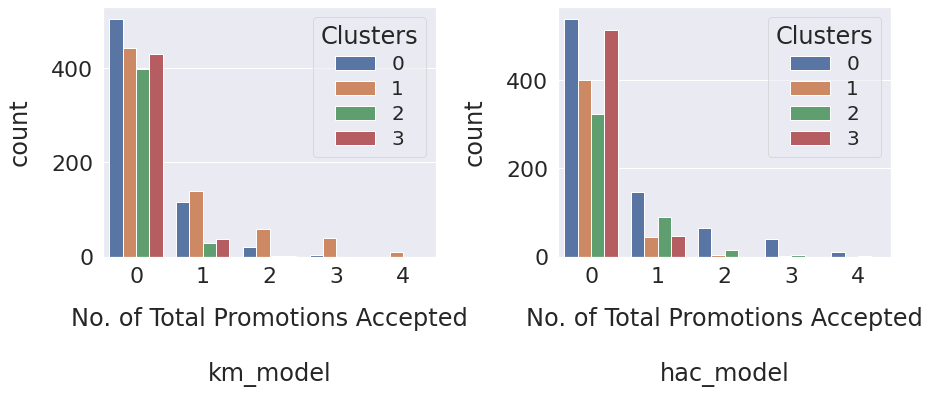

In [144]:
data["Total_Promotions"] = data["Cmp1"] + data["Cmp2"] + data["Cmp3"] + data["Cmp4"] + data["Cmp5"]

def countplots_prof(model_name):
    fig, ax = plt.subplots(1, 2, figsize = (13, 6))
    ax = ax.flatten()
       
    for ax, model in zip(ax, model_name):
        ax = sns.countplot(ax = ax, data = data, x = "Total_Promotions", hue = model)        
        ax.set(xlabel = "{0}\n\n{1}".format("No. of Total Promotions Accepted", model))
        ax.xaxis.labelpad = 20
        ax.yaxis.labelpad = 20
        ax.legend(loc = "upper right", framealpha= 0.6, fontsize = 'small', handlelength = 2, 
                  labelspacing=0.3)
        ax.get_legend().set_title("Clusters") 
    plt.tight_layout()
                
countplots_prof(model_name)

#### We observe that the campaigns didn't receive a good response. Overall, there are very few participants who accepted the promotions. Moreover, no one took part in all 5 of them. Perhaps better-targeted and well-planned campaigns are required to boost sales

## Targeting by Education and Status

#### Here we will compare the total amount spent by education level and clusters and living status and clusters

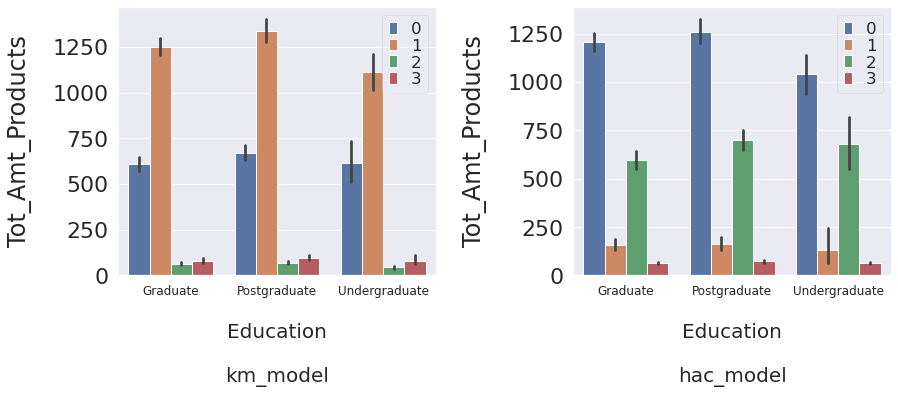

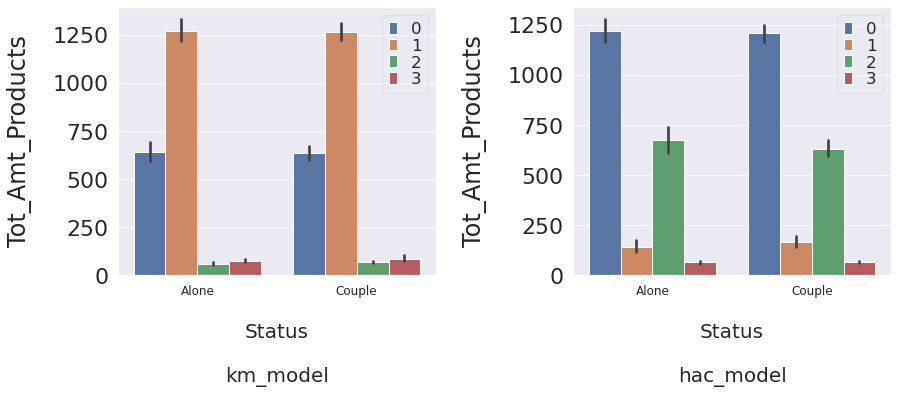

In [149]:
def barplots_prof(model_name, args):
    fig, ax = plt.subplots(1, 2, figsize = (13, 6))
    ax = ax.flatten()
    
    for ax, model in zip(ax, model_name):
        ax = sns.barplot(ax = ax, data = data, x = args, y = 'Tot_Amt_Products', hue = model)
        ax.set_xlabel("{0}\n\n{1}".format(args, model),
                      fontsize = "20", labelpad = 25)
        ax.tick_params(axis='x', labelsize= "12" )
        ax.yaxis.labelpad = 20
        ax.legend(loc = "upper right", framealpha= 0.4, fontsize = 'x-small', handlelength = 0.5, 
                  labelspacing=0.1)
    plt.tight_layout()
    
category_list = ['Education', "Status"]
for i in category_list:
    barplots_prof(model_name, i)

#### For the high income group, postgraduates spend the highest amount followed by undergraduates and the least by graduates. Other groups/clusters dont have much difference in their spending by education level.
#### Also, by living status, both single and couple spend roughly the same amount.

### Further segregrating education and status by each level

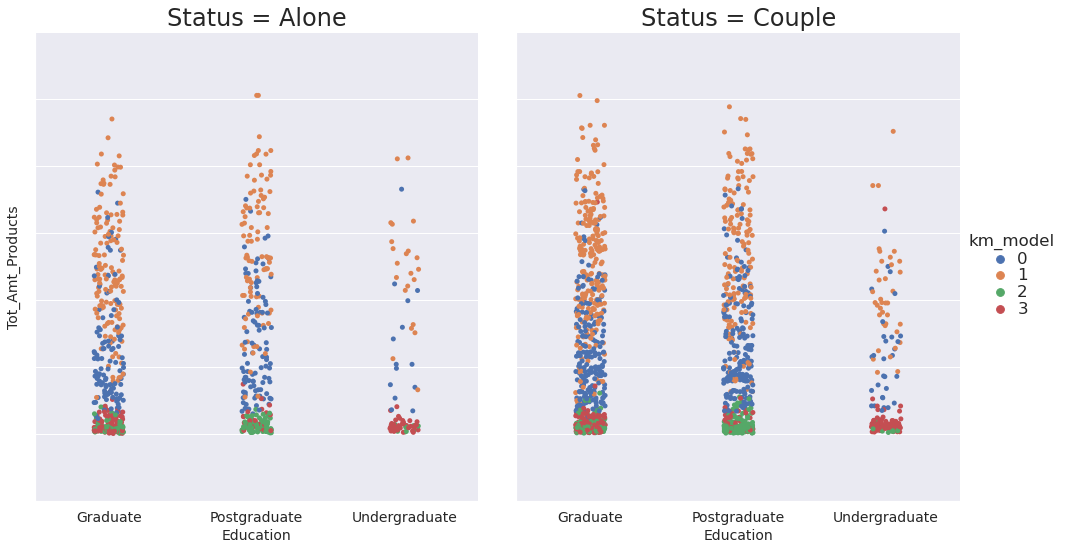

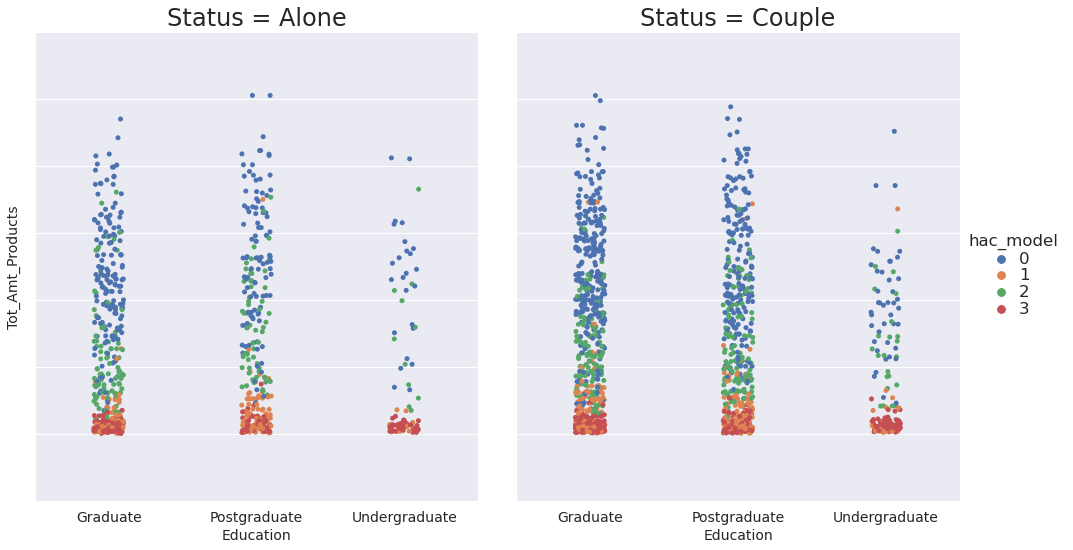

In [150]:
for i in model_name:
        ax = sns.catplot(ax = ax, data = data, x = "Education", y = 'Tot_Amt_Products', col = "Status",
                         hue = i, height = 8, aspect = .9)
        ax.set_xticklabels(fontsize = "14")
        ax.set_yticklabels(fontsize = "14")      
        ax.set_xlabels(fontsize = "14")
        ax.set_ylabels(fontsize = "14")

#### Again, we dont observe much difference in spending across living status. Undergraduates consists of mostly lowest income thus spend the least amount.

## Targeting by Seniority, Recency and Web_Purchases

#### Here we will compare the total amount spent by Seniority(of Membership), Recency(Last Purchase) and Web_Purchases with respect to clusters 

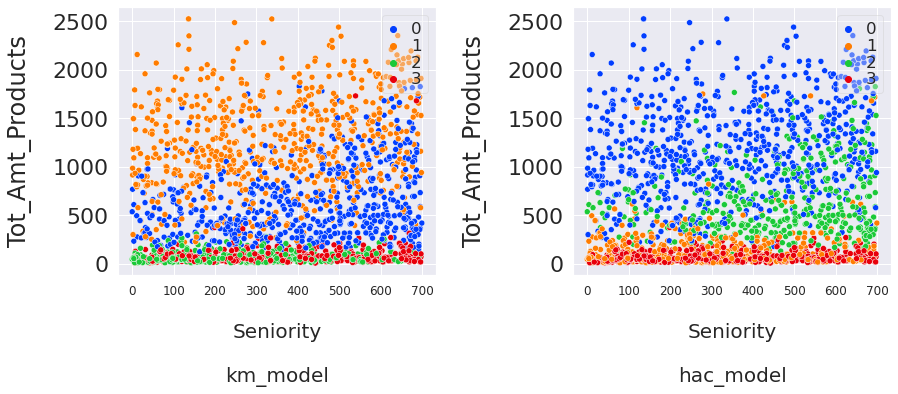

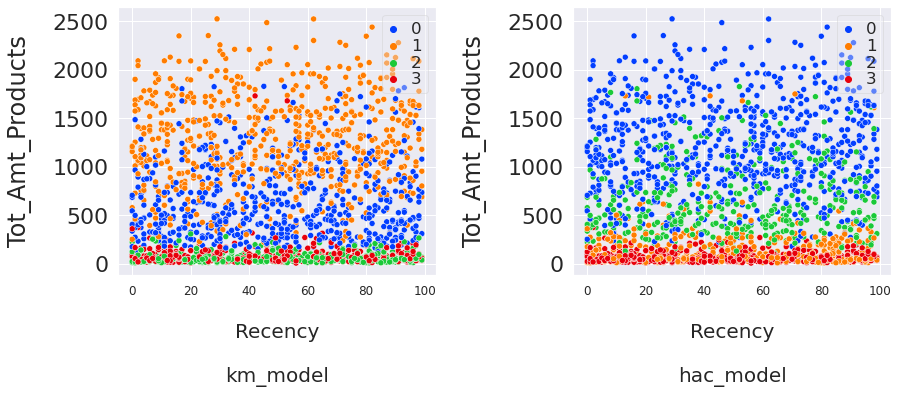

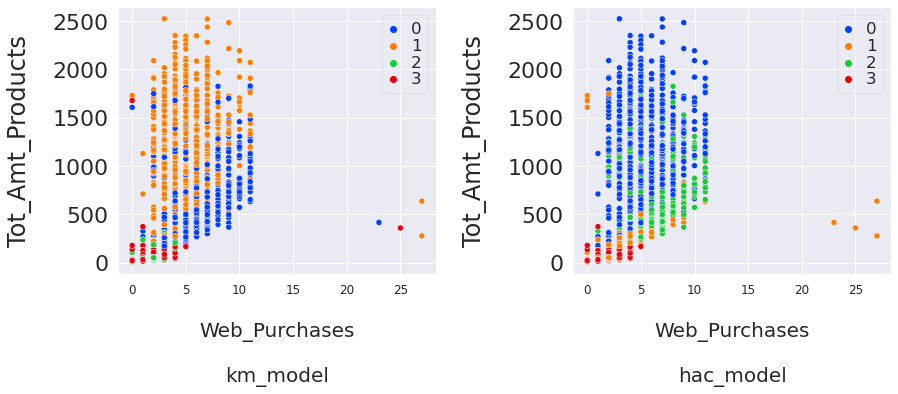

In [151]:
def scatterplots_prof(model_name, args):
    fig, ax = plt.subplots(1, 2, figsize = (13, 6))
    ax = ax.flatten()
    
    for ax, model in zip(ax, model_name):
        ax = sns.scatterplot(ax = ax, data = data, x = args, y = 'Tot_Amt_Products', hue = model, 
                             palette = "bright")
        ax.set_xlabel("{0}\n\n{1}".format(args, model),
                      fontsize = "20", labelpad = 25)
        ax.tick_params(axis='x', labelsize= "12" )
        ax.yaxis.labelpad = 20
        ax.legend(loc = "upper right", framealpha= 0.4, fontsize = 'x-small', handlelength = 0.5, 
                  labelspacing=0.1)
    plt.tight_layout()
    
discrete_high_count = ['Seniority', "Recency", "Web_Purchases"]
for i in discrete_high_count:
    scatterplots_prof(model_name, i)

#### Here, we dont observe any pattern in Seniority and Recency with regard to spending across clusters.
#### Moderate-High income cluster makes the maximum web purchases followed by high income group.

## Targeting by Age, Total Number of Children

#### Here we will compare the total amount spent by 'Age groups' and 'number of children' in a family with respect to clusters 

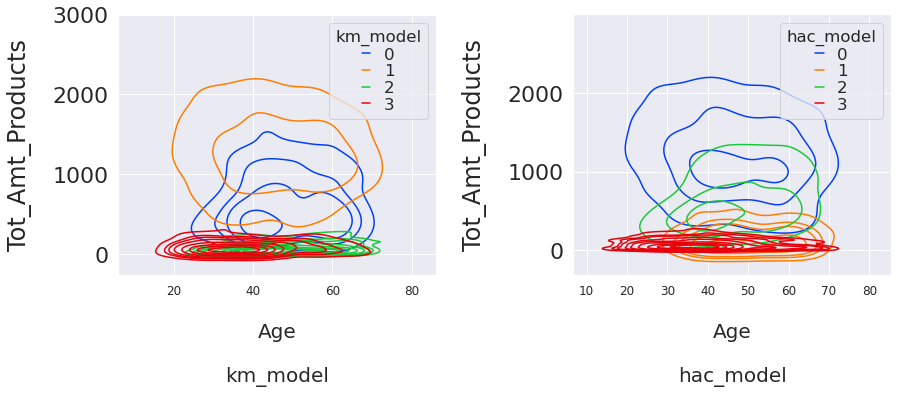

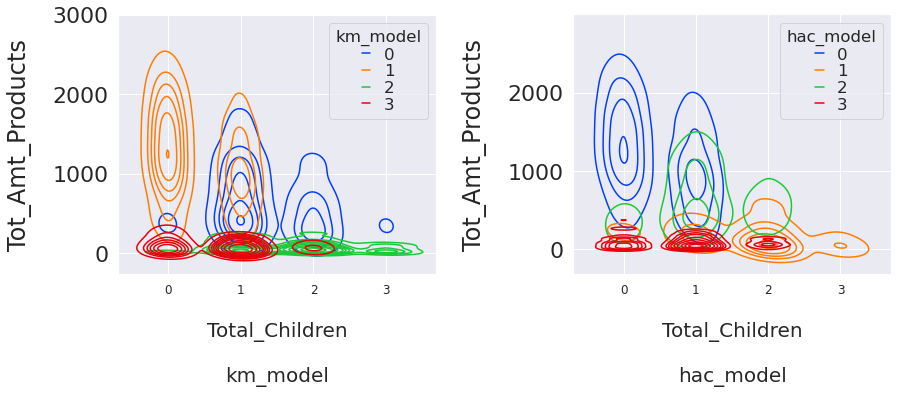

In [153]:
import matplotlib as mpl # Bug in Seaborn, use mcl to access legend

def kdeplots_prof(model_name, args):
    fig, ax = plt.subplots(1, 2, figsize = (13, 6))
    ax = ax.flatten()
    
    for ax, model in zip(ax, model_name):
        ax = sns.kdeplot(ax = ax, data = data, x = args, y = 'Tot_Amt_Products', hue = model, 
                         palette = "bright")
        ax.set_xlabel("{0}\n\n{1}".format(args, model),
                      fontsize = "20", labelpad = 25)
        ax.tick_params(axis='x', labelsize= "12")
        ax.yaxis.labelpad = 20
        
        # Bug in  Seaborn with kde plots for adjusting legend
        mpl.rcParams["legend.title_fontsize"]  = 'x-small'
        mpl.rcParams["legend.fontsize"]  = 'x-small'
        mpl.rcParams["legend.handlelength"]  = 0.5
        mpl.rcParams["legend.labelspacing"] = 0.1

    plt.tight_layout()
    
discrete_low_count = ["Age", "Total_Children"]
for i in discrete_low_count:
    kdeplots_prof(model_name, i)

#### Here, we observe 40-60 age group spends the maximum amount with density maximizing at around 50 for highest income group and around 45 for moderate-high income group. Below 40 group spends the least amount
#### People with no children have the highest income an spend the most followed by people having 1 children from moderate-High income cluster. The income and spending of people with 2 children or more reduces drastically in comparison.

### Note: In the code above Seaborn has a bug with 'kde plots' for adjusting legend. Hence, I am manually overriding and accessing artists directly through 'rcParams' from mpl library.

# Suggestion for Next Steps

* We can try to gain more information on the data and do more indepth analysis of outliers, which would be faulty or relevant to us
* We can try to identify our goal for the required number of clusters
* We can try to use other dimensionality reduction techniques such Kernel PCA, Multidimensional Scaling techniques such as Tsne, Manifold reduction.
* We can try using other clustering techniques such as DbScan, Mean-shit etc